In [57]:
import torch 

In [58]:
mean = [0.4914, 0.4822, 0.4465]
std = [0.2023, 0.1994, 0.2010]

In [59]:
# X = torch.load("/home/sjoshi/mtt-distillation/logged_files/CIFAR100/large_label_lr_no_aug_no_zca/images_best.pt")
# X0 = torch.load("/home/sjoshi/mtt-distillation/logged_files/CIFAR100/large_label_lr_no_aug_no_zca/images_0.pt")
# Y = torch.load("/home/sjoshi/mtt-distillation/logged_files/CIFAR100/large_label_lr_no_aug_no_zca/labels_best.pt")
# Y0 = torch.load("/home/sjoshi/mtt-distillation/logged_files/CIFAR100/large_label_lr_no_aug_no_zca/labels_0.pt")


X = torch.load("/home/jennyni/ssl-mtt/logged_files/Tiny/2024-01-19_11:16:10None/images_1000.pt")
X0 = torch.load("/home/jennyni/ssl-mtt/logged_files/Tiny/2024-01-19_11:16:10None/images_1.pt")
difference = X0 - X

In [60]:
print(X0 - X)

tensor([[[[-7.1065e-03, -1.1812e-02, -1.7906e-02,  ..., -1.1712e-02,
           -6.0788e-03,  2.0475e-03],
          [ 6.9199e-03,  8.1874e-03,  1.1408e-02,  ...,  1.5290e-03,
            5.5851e-03,  1.3478e-02],
          [ 1.6314e-03,  1.8349e-03, -2.6885e-03,  ..., -1.3197e-02,
           -9.4938e-04,  1.2047e-02],
          ...,
          [-8.4571e-03, -4.1442e-03, -6.5439e-03,  ..., -3.2393e-03,
           -4.0222e-03,  1.2990e-02],
          [-1.7886e-03,  6.1131e-03,  5.6074e-03,  ...,  1.4360e-03,
           -8.3606e-03,  9.6233e-03],
          [ 2.1168e-03,  1.4525e-03,  1.1199e-02,  ..., -4.7607e-03,
           -3.3606e-03,  6.4505e-03]],

         [[ 2.5304e-03,  5.0660e-03,  9.1444e-03,  ...,  2.9387e-03,
            2.6468e-03,  5.5212e-03],
          [-8.0461e-03, -2.0267e-02, -1.3108e-02,  ..., -2.4389e-02,
           -2.1243e-02, -2.3729e-03],
          [-5.4764e-03, -1.1832e-02, -1.1146e-02,  ..., -9.8040e-03,
           -1.0207e-02,  3.0261e-03],
          ...,
     

In [61]:
print(X0)

tensor([[[[-1.0390, -1.0219, -1.0048,  ...,  0.6734,  0.7077,  0.7419],
          [-1.0390, -1.0390, -1.0219,  ...,  0.7248,  0.7591,  0.7762],
          [-1.0390, -1.0219, -1.0219,  ...,  0.7933,  0.8276,  0.8447],
          ...,
          [ 0.0912,  0.0569,  0.1939,  ...,  1.1015,  1.3242,  1.4783],
          [ 0.2111,  0.1768,  0.2453,  ...,  1.2043,  1.1187,  1.2043],
          [ 0.2967,  0.2111,  0.2282,  ...,  1.2214,  1.2043,  1.2214]],

         [[-0.6176, -0.6001, -0.5651,  ...,  0.8529,  0.8880,  0.9230],
          [-0.6176, -0.6001, -0.5826,  ...,  0.9055,  0.9405,  0.9580],
          [-0.6352, -0.6176, -0.6176,  ...,  0.9755,  1.0105,  1.0280],
          ...,
          [ 0.4853,  0.4503,  0.5728,  ...,  1.4132,  1.6933,  1.8859],
          [ 0.6078,  0.5728,  0.6254,  ...,  1.5182,  1.4832,  1.5707],
          [ 0.6954,  0.6078,  0.6078,  ...,  1.5357,  1.5182,  1.5707]],

         [[-1.7173, -1.6999, -1.7173,  ..., -0.8284, -0.7936, -0.7761],
          [-1.7173, -1.7522, -

In [62]:
def rescale(tensor_img, ):
    tensor_img = tensor_img.clone()
    rescaled_imgs = torch.empty_like(tensor_img)
    for i, (t, m, s) in enumerate(zip(tensor_img, mean, std)):
        rescaled_imgs[i] = t.mul(s).add(m)
    rescaled_imgs[rescaled_imgs < 0] = 0
    rescaled_imgs[rescaled_imgs > 1] = 1
    return rescaled_imgs

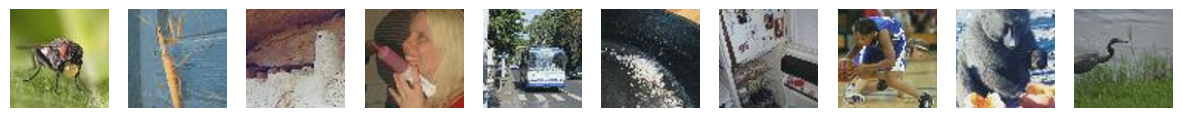

In [63]:
import matplotlib.pyplot as plt
from torchvision import transforms as T

num_images = 10
to_image = T.ToPILImage()

fig, axes = plt.subplots(1, num_images, figsize=(15, 15))  

for i in range(num_images):
    img = to_image(rescale(X0[i])).resize((96, 96))
    axes[i].imshow(img)
    axes[i].axis('off')  

plt.show()


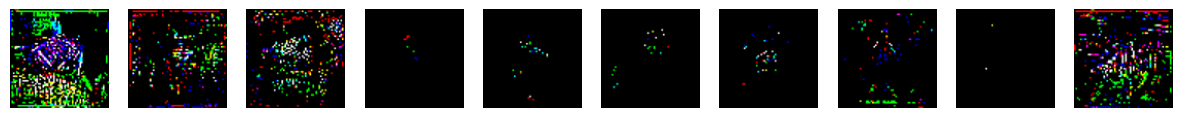

In [66]:
import matplotlib.pyplot as plt
from torchvision import transforms as T

num_images = 10
to_image = T.ToPILImage()

fig, axes = plt.subplots(1, num_images, figsize=(15, 15))  

for i in range(num_images):
    img = to_image(rescale(X0[i]) -rescale(X[i])).resize((96, 96))
    axes[i].imshow(img)
    axes[i].axis('off')  

plt.show()

In [65]:
from torch.nn import functional as F 
i=908
print(F.mse_loss(X[i], X0[i]))
print(F.mse_loss(Y[i], Y0[i]))

tensor(4.1373e-05)


NameError: name 'Y' is not defined

In [ ]:
import pickle 

with open("/data/file_transfer/cifar100-0.02-kmeans-sas-indices.pkl", "rb") as f:
    pickle.load(f)
sas = 